# Midterm Exam Requirements

1. Train and build a machine learning model using the following ML algorithms. Make sure to hyper-tune the parameters of the ML algorithm.

    * Logistic Regression
    * Decision Trees
    * Random Forest
    * K Nearest Neighbor
    * Naive Bayes
    * SVM 

2.  Use the following to evaluate the performance of the model for each ML algorithm:

    * Accuracy
    * Precision and Recall
    * ROC AUC
    * Confusion Matrix

3. Compare the performance metrics of the model and interpret your result.

4. Fetal_health classification

  * 1 = normal
  * 2 = suspect
  * 3 = pathological
  

# Logistic Regression



In [1]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\core i5\Documents\GitHub\DataScience\datascience\CPE 312\Midterm Exam\data\fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df.info()
# No missing values and all are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df["fetal_health"].unique()

array([2., 1., 3.])

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


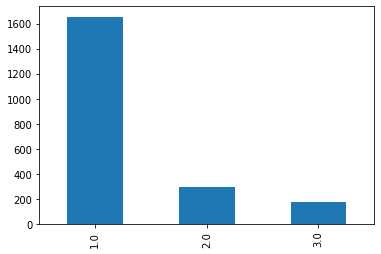

In [6]:
# is there an imbalance in the dataset?
df["fetal_health"].value_counts().plot(kind = "bar")
print(df["fetal_health"].value_counts())

#it seems categorial 1 (normal) is more abundant than the other categories. This may cause our model to
# better predict class 1

In [7]:
# Let us check the correlation of each of the feature columns with the target column

y_correl = (df["fetal_health"]).astype(int)
fields = list(df.columns[:-1])  # everything except fetal_health
correlations = df[fields].corrwith(y_correl)
correlations.sort_values(inplace=True)
correlations

accelerations                                            -0.364066
histogram_mode                                           -0.250412
histogram_mean                                           -0.226985
mean_value_of_long_term_variability                      -0.226797
histogram_median                                         -0.205033
uterine_contractions                                     -0.204894
histogram_tendency                                       -0.131976
mean_value_of_short_term_variability                     -0.103382
histogram_width                                          -0.068789
histogram_max                                            -0.045265
histogram_number_of_peaks                                -0.023666
histogram_number_of_zeroes                               -0.016682
light_decelerations                                       0.058870
histogram_min                                             0.063175
fetal_movement                                            0.08

In [8]:
df.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
90%,146.000000,0.009000,0.012000,0.008000,0.006000,0.000000,0.000000,68.000000,2.500000,38.00000,...,133.000000,189.000000,8.000000,1.000000,156.000000,153.000000,155.000000,53.000000,1.000000,2.000000
95%,149.000000,0.011000,0.028000,0.009000,0.008000,0.000000,0.002000,75.000000,3.000000,56.00000,...,139.000000,198.000000,10.000000,2.000000,160.000000,157.000000,159.000000,76.000000,1.000000,3.000000
99%,158.000000,0.015000,0.338750,0.011000,0.012000,0.000000,0.003000,81.000000,4.400000,77.75000,...,151.000000,210.000000,12.000000,3.000000,169.750000,164.000000,167.000000,135.500000,1.000000,3.000000


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['fetal_health'], axis=1)
Y = df['fetal_health']

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)


In [10]:
print("train_inputs shape is {}".format(X_train.shape))
print("train_target shape is {}".format(y_train.shape))
print("test_inputs shape is {}".format(X_test.shape))
print("test_target shape is {}".format(y_test.shape))

train_inputs shape is (1488, 21)
train_target shape is (1488,)
test_inputs shape is (638, 21)
test_target shape is (638,)


In [11]:
num_cols = X_train.columns.tolist()
len(num_cols)

21

In [12]:
# Importing libraries for scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

C:\Users\core i5\AppData\Local\Temp/ipykernel_10220/505808930.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
C:\Users\core i5\Documents\GitHub\DataScience\pyenv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\core i5\Documents\GitHub\DataScience\pyenv\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [13]:
X_train.describe().loc[["min","max"]]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [14]:
X_test.describe().loc[["min","max"]]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
y_train.sample(5)

1030    1.0
43      1.0
1069    1.0
1679    1.0
473     3.0
Name: fetal_health, dtype: float64

## Training the Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
weight_df = pd.DataFrame(
    {"feature":X_train.columns.tolist(),
    "weight": model.coef_.tolist()[0]}
)
weight_df.sort_values(ascending = False, by = "weight")

,feature,weight
1,accelerations,5.166611
3,uterine_contractions,2.126080
16,histogram_mode,1.951730
8,mean_value_of_short_term_variability,1.084694
18,histogram_median,0.952148
4,light_decelerations,0.840984
17,histogram_mean,0.482478
10,mean_value_of_long_term_variability,0.394768
11,histogram_width,0.300951
20,histogram_tendency,0.215238


In [117]:
import plotly.graph_objects as go

neg_weights = weight_df[weight_df["weight"] < 0].sort_values("weight", ascending = False)
pos_weights = weight_df[weight_df["weight"] > 0].sort_values("weight", ascending = False)

fig = go.Figure()
fig.add_trace(go.Bar(x=neg_weights.feature, y=neg_weights.weight,
                marker_color='crimson',
                name='negative weights'))
fig.add_trace(go.Bar(x=pos_weights.feature, y=pos_weights.weight,
                marker_color='lightslategrey',
                name='positive weights'
                ))
#fig.update_xaxes(visible = False)
fig.update_xaxes(nticks = 100)
fig.update_yaxes(nticks=20, ticks = "outside")
fig.update_layout(
    margin=dict(l=50, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue"
)
fig.show()

generally the higher the coefficient the more the feature is able to accurately predict the target variable. A high negative coefficient value means that the relationship is inverse, but strong.


## Making Predictions on the test dataset

In [18]:
val_predictions = model.predict(X_test)

In [19]:
# check the accuracy of the train_target and train_predictions
from sklearn.metrics import accuracy_score
print("accuracy is: {}".format(accuracy_score(y_test, val_predictions)))

accuracy is: 0.8824451410658307


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, val_predictions, normalize = 'true')

array([[0.98602794, 0.01197605, 0.00199601],
       [0.50617284, 0.4691358 , 0.02469136],
       [0.23214286, 0.21428571, 0.55357143]])

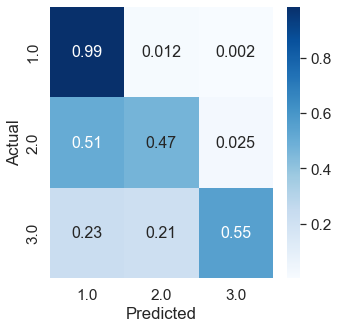

In [21]:
data = confusion_matrix(y_test, val_predictions, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(val_predictions), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

as one can see the confusion matrix reveals that the model is better at predicting the 1 (normal) class than the other classes. A worrisome data is that we have a high false positive for 1 when the actual data is actually of class 2. 


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, val_predictions))

              precision    recall  f1-score   support

         1.0       0.90      0.99      0.94       501
         2.0       0.68      0.47      0.55        81
         3.0       0.91      0.55      0.69        56

    accuracy                           0.88       638
   macro avg       0.83      0.67      0.73       638
weighted avg       0.87      0.88      0.87       638



## hypertuning the Logistic Regression Model

In [23]:
param_grid = [
    {'penalty':['l1', 'l2','elasticnet','none'],
     'solver':['liblinear','newton-cg','lbfgs','sag','saga'],
     'max_iter': [100,1000,1500,5000],
    }
]

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
logmodel = LogisticRegression()

In [26]:
clf = GridSearchCV(logmodel, param_grid, cv=5, verbose=True, n_jobs=-1)

In [27]:
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


C:\Users\core i5\Documents\GitHub\DataScience\pyenv\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [0.89515739        nan        nan        nan 0.90187332 0.88171649
 0.89313267 0.89313267 0.89313267 0.89380381        nan        nan
        nan        nan        nan        nan 0.89245023 0.89581045
 0.89513479 0.89378799 0.89515739        nan        nan        nan
 0.90187332 0.88171649 0.89313267 0.89313267 0.89380381 0.89380381
        nan        nan        nan        nan        nan        nan
 0.89245023 0.89245023 0.89245023 0.89177683 0.89515739        nan
        nan        nan 0.90187332 0.88171649 0.89313267 0.89313267
 0.89313267 0.89380381        nan        nan        nan        nan
        nan        nan 0.89245023 0.89245023 0.89245023 0.89177683
 0.89515739        nan        nan        nan 0.90187332 0.88171649
 0.89313267 0.89313267 0.89313267 0.89380381        nan        nan
        nan        nan   

In [28]:
best_clf.best_params_

{'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

## Classfication Metrics of Optimized Logistic Regression Model

In [29]:
optimized_y_prediction = best_clf.predict(X_test)
print("new accuracy is: {}".format(accuracy_score(y_test, optimized_y_prediction)))

new accuracy is: 0.877742946708464


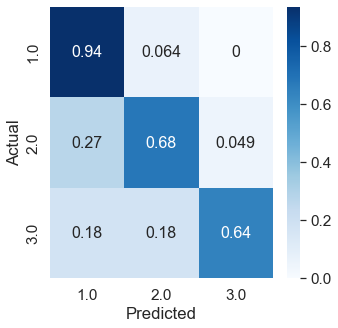

In [30]:
data = confusion_matrix(y_test, optimized_y_prediction, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(optimized_y_prediction), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

Previous confusion matrix:

```
array([[0.98602794, 0.01197605, 0.00199601],
       [0.50617284, 0.4691358 , 0.02469136],
       [0.23214286, 0.21428571, 0.55357143]])
```

Through hypertuning we were able to increase our prediction power for class 2 and 3. Though class 1 decreased in accuracy/recall, the value of 0.94 is still acceptable. I would not necessarily use this model to predict accurately predict if a fetus has a suspect or pathological condition. In other words, I would not trust the model if it were to predict that the fetus is either pathological or suspect; however, I would trust the model if it predicted that the fetus is normal.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, optimized_y_prediction))

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       501
         2.0       0.57      0.68      0.62        81
         3.0       0.90      0.64      0.75        56

    accuracy                           0.88       638
   macro avg       0.80      0.75      0.77       638
weighted avg       0.89      0.88      0.88       638



In [32]:
prob_a=best_clf.predict_proba(X_test)

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_score(y_test, prob_a, multi_class='ovo', average='weighted')

0.9562927214230212

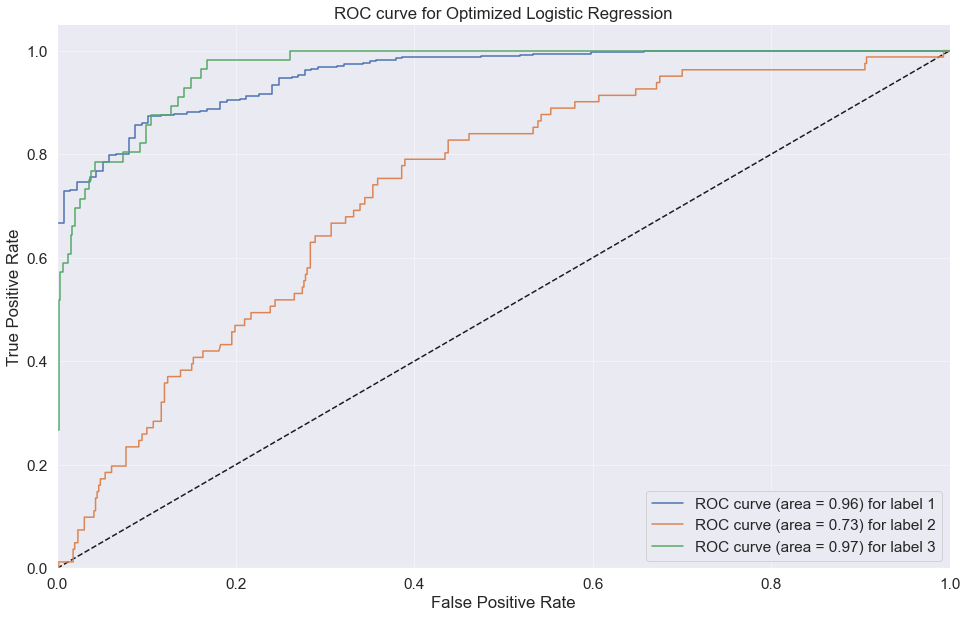

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve for Optimized Logistic Regression')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(best_clf, X_test, y_test, n_classes=3, figsize=(16, 10))

# Random Forest Model

In [35]:
# Let's check our training and test datasets again
print("train_inputs shape is {}".format(X_train.shape))
print("train_target shape is {}".format(y_train.shape))
print("test_inputs shape is {}".format(X_test.shape))
print("test_target shape is {}".format(y_test.shape))

train_inputs shape is (1488, 21)
train_target shape is (1488,)
test_inputs shape is (638, 21)
test_target shape is (638,)


In [36]:
# Let us check if they are still standardized
X_test.describe().loc[["min","max"]]

# X_test is used to check here but X_train is also standardized

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [37]:
from sklearn.ensemble import RandomForestClassifier

RandomForestModel = RandomForestClassifier()
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier()

## Classification Metrics prior to Hypertuning

In [38]:
y_predictions_randomforest = RandomForestModel.predict(X_test)
accuracy_score(y_test, y_predictions_randomforest)

0.9294670846394985

In [39]:
confusion_matrix(y_test, y_predictions_randomforest, normalize = "true")

array([[0.96806387, 0.02994012, 0.00199601],
       [0.24691358, 0.74074074, 0.01234568],
       [0.05357143, 0.08928571, 0.85714286]])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions_randomforest))

              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       501
         2.0       0.75      0.74      0.75        81
         3.0       0.96      0.86      0.91        56

    accuracy                           0.93       638
   macro avg       0.89      0.86      0.87       638
weighted avg       0.93      0.93      0.93       638



Overall, Random Forest Model is performing significantly better than the Logistic Regression Model

## Hypertuning our Random Forest model

In [41]:
randomforest_random_grid = {'n_estimators': [100,200,300,400],
                          'max_depth': [4,7,10,15],
                          'min_samples_leaf': [1, 2, 4],
                          'criterion':['gini', 'entropy']}

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
clf_randomforest = GridSearchCV(RandomForestModel, randomforest_random_grid, cv=2, verbose=True, n_jobs=-1)

In [44]:
best_clf_randomforest = clf_randomforest.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


## Classification Metrics on Optimized Random Forest Model

In [45]:
best_clf_randomforest.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'n_estimators': 400}

In [46]:
RandomForestModel_optimized = RandomForestClassifier(criterion= 'entropy',
 max_depth= 10,
 min_samples_leaf= 1,
 n_estimators= 400)
RandomForestModel_optimized.fit(X_train, y_train)
y_predictions_randomforest_optimized = RandomForestModel_optimized.predict(X_test)
print("old accuracy score is: {}".format(accuracy_score(y_test, y_predictions_randomforest)))
print("optimized accuracy score is: {}".format(accuracy_score(y_test, y_predictions_randomforest_optimized)))

old accuracy score is: 0.9294670846394985
optimized accuracy score is: 0.9373040752351097


In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

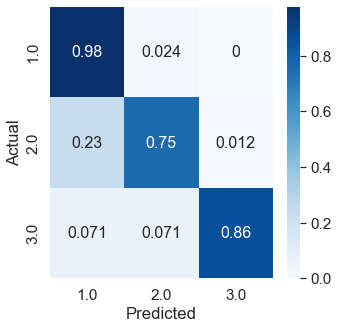

In [48]:
data = confusion_matrix(y_test, y_predictions_randomforest_optimized, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_predictions_randomforest_optimized), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

In [49]:
print(classification_report(y_test, y_predictions_randomforest_optimized))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       501
         2.0       0.79      0.75      0.77        81
         3.0       0.98      0.86      0.91        56

    accuracy                           0.94       638
   macro avg       0.91      0.86      0.88       638
weighted avg       0.94      0.94      0.94       638



In [50]:
print("Previous ROC_AUC score {}".format(roc_auc_score(y_test, RandomForestModel.predict_proba(X_test), multi_class='ovo', average='weighted')
))
print("new ROC_AUC Score {}".format(roc_auc_score(y_test, RandomForestModel_optimized.predict_proba(X_test), multi_class='ovo', average='weighted')))

Previous ROC_AUC score 0.9760541708397076
new ROC_AUC Score 0.9796714953599462


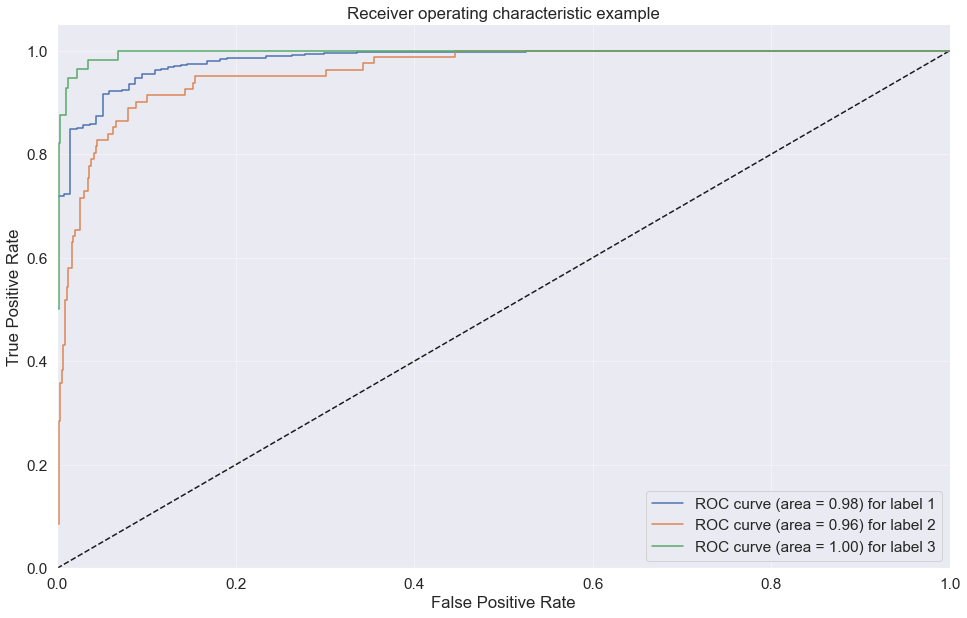

In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(RandomForestModel_optimized, X_test, y_test, n_classes=3, figsize=(16, 10))

# Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier

decisiontree_model = DecisionTreeClassifier()
decisiontree_model.fit(X_train, y_train)


DecisionTreeClassifier()

## Classification Metrics prior to hypertuning

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [54]:
y_predictions_decisiontree = decisiontree_model.predict(X_test)
print("accuracy {}".format(accuracy_score(y_test, y_predictions_decisiontree)))

accuracy 0.841692789968652


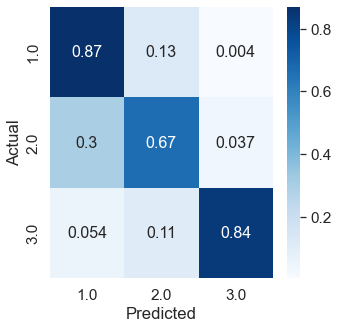

In [55]:
data = confusion_matrix(y_test, y_predictions_decisiontree, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_predictions_decisiontree), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

In [56]:
print(classification_report(y_test, y_predictions_decisiontree))

              precision    recall  f1-score   support

         1.0       0.94      0.87      0.90       501
         2.0       0.44      0.67      0.53        81
         3.0       0.90      0.84      0.87        56

    accuracy                           0.84       638
   macro avg       0.76      0.79      0.77       638
weighted avg       0.87      0.84      0.85       638



In [57]:
roc_auc_score(y_test, decisiontree_model.predict_proba(X_test), multi_class='ovo', average='weighted')

0.8439611306135801

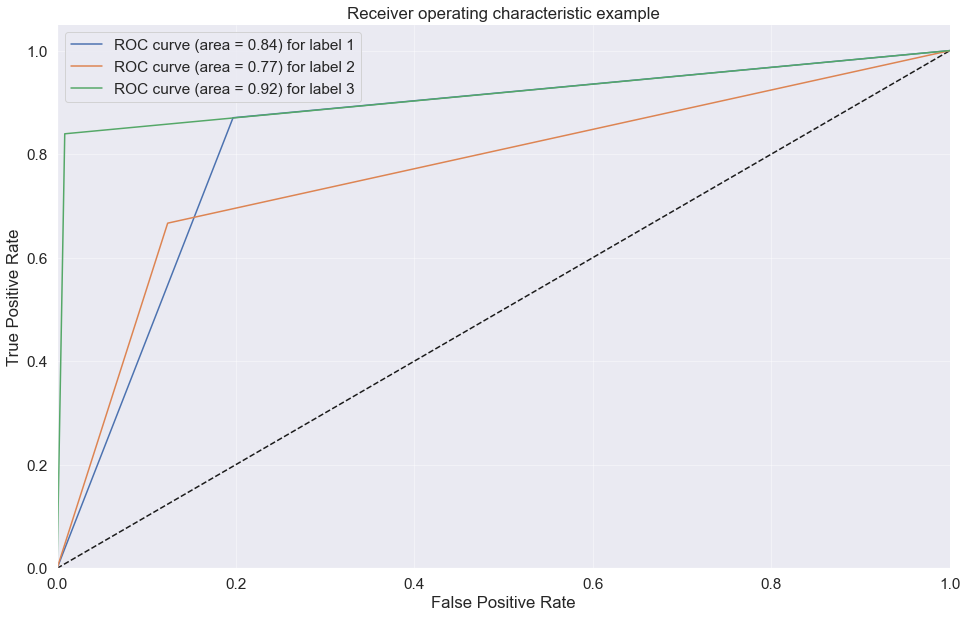

In [58]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = decisiontree_model.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(decisiontree_model, X_test, y_test, n_classes=3, figsize=(16, 10))

## Tuning the Decision Tree Model

In [59]:
decisiontree_random_grid = {
                          'max_depth': [4,7,10,15],
                          'min_samples_leaf': [1, 2, 4],
                          'criterion':['gini', 'entropy'],
                          }

In [60]:
clf_decisiontree = GridSearchCV(decisiontree_model, decisiontree_random_grid, cv=5, verbose=True, n_jobs=-1)

In [61]:
best_clf_decisiontree = clf_decisiontree.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


## Classification Metrics on Optimized Decision Tree Model

In [62]:
best_clf_decisiontree.best_params_

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1}

In [63]:
decisiontree_model_optimized = DecisionTreeClassifier(criterion= 'gini', max_depth= 15,
 min_samples_leaf= 1)
decisiontree_model_optimized.fit(X_train, y_train)
y_predictions_decisiontree_optimized = decisiontree_model_optimized.predict(X_test)
print("old accuracy score is: {}".format(accuracy_score(y_test, y_predictions_decisiontree)))
print("optimized accuracy score is: {}".format(accuracy_score(y_test, y_predictions_decisiontree_optimized)))

old accuracy score is: 0.841692789968652
optimized accuracy score is: 0.8526645768025078


In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

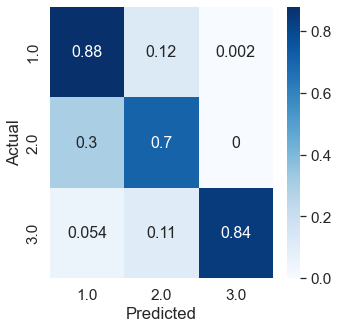

In [65]:
data = confusion_matrix(y_test, y_predictions_decisiontree_optimized, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_predictions_decisiontree_optimized), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

In [66]:
print(classification_report(y_test, y_predictions_decisiontree_optimized))

              precision    recall  f1-score   support

         1.0       0.94      0.88      0.91       501
         2.0       0.46      0.70      0.56        81
         3.0       0.98      0.84      0.90        56

    accuracy                           0.85       638
   macro avg       0.79      0.81      0.79       638
weighted avg       0.88      0.85      0.86       638



In [67]:
print("Previous ROC_AUC score {}".format(roc_auc_score(y_test, decisiontree_model.predict_proba(X_test), multi_class='ovo', average='weighted')
))
print("new ROC_AUC Score {}".format(roc_auc_score(y_test, decisiontree_model_optimized.predict_proba(X_test), multi_class='ovo', average='weighted')))

Previous ROC_AUC score 0.8439611306135801
new ROC_AUC Score 0.8556263911550107


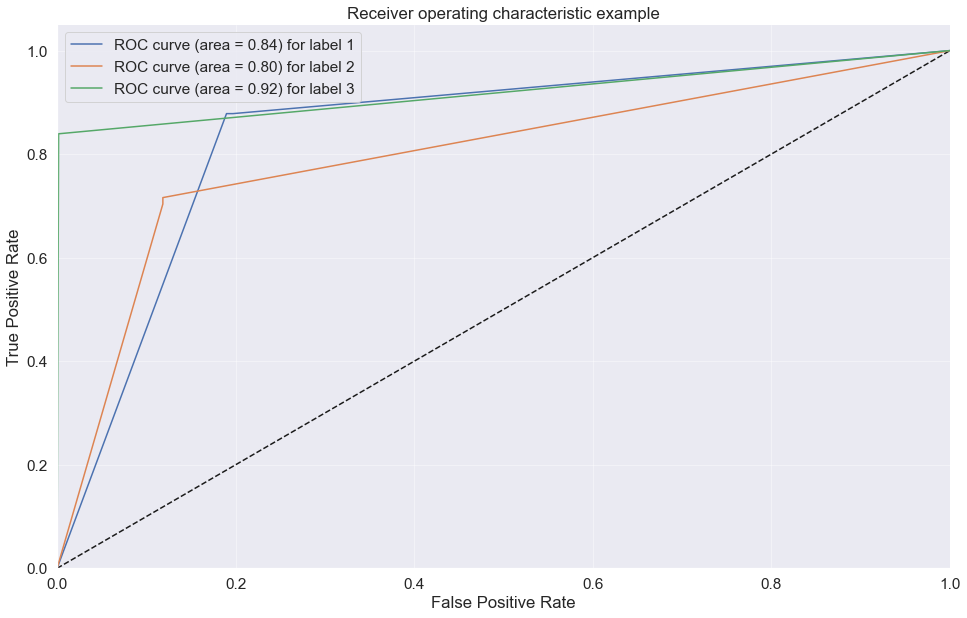

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(decisiontree_model_optimized, X_test, y_test, n_classes=3, figsize=(16, 10))

# KNN model

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model = knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [70]:
print(accuracy_score(y_test, y_pred_knn))

0.8855799373040752


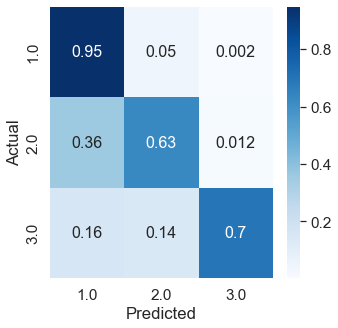

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

data_confusion = confusion_matrix(y_test, y_pred_knn, normalize = 'true')
df_cm = pd.DataFrame(data_confusion, columns=np.unique(y_pred_knn), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

## Tuning KNN hyperparameters

In [72]:
knn_random_grid = {
                          'leaf_size':[n for n in range(1,20)],
                          'n_neighbors':[n for n in range(1,20)],
                          'p':[1,2]
                          }

In [73]:
clf_knn = GridSearchCV(knn_model, knn_random_grid, cv=2, verbose=True, n_jobs=-1)

In [74]:
best_clf_knn = clf_knn.fit(X_train, y_train)

Fitting 2 folds for each of 722 candidates, totalling 1444 fits


## Classifier Metrics of Optimized KNN Model

In [75]:
best_clf_knn.best_params_

{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}

In [76]:
knn_model_optimized = KNeighborsClassifier(leaf_size = 1, n_neighbors=1, p = 2)
knn_model_optimized.fit(X_train, y_train)
y_predictions_knn_optimized = knn_model_optimized.predict(X_test)
print("old accuracy score is: {}".format(accuracy_score(y_test, y_pred_knn)))
print("optimized accuracy score is: {}".format(accuracy_score(y_test, y_predictions_knn_optimized)))

old accuracy score is: 0.8855799373040752
optimized accuracy score is: 0.9043887147335423


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

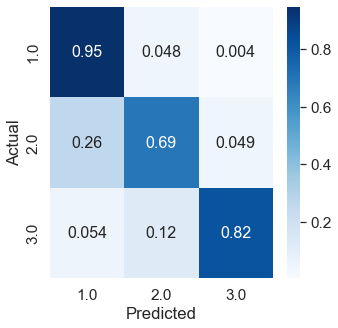

In [78]:
data = confusion_matrix(y_test, y_predictions_knn_optimized, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_predictions_knn_optimized), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

In [79]:
print(classification_report(y_test, y_predictions_knn_optimized))

              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       501
         2.0       0.64      0.69      0.67        81
         3.0       0.88      0.82      0.85        56

    accuracy                           0.90       638
   macro avg       0.83      0.82      0.82       638
weighted avg       0.91      0.90      0.91       638



In [80]:
print("Previous ROC_AUC score {}".format(roc_auc_score(y_test, knn_model.predict_proba(X_test), multi_class='ovo', average='weighted')
))
print("new ROC_AUC Score {}".format(roc_auc_score(y_test, knn_model_optimized.predict_proba(X_test), multi_class='ovo', average='weighted')))

Previous ROC_AUC score 0.9271871045667204
new ROC_AUC Score 0.8746719570470775


New ROC_AUC score lowered, which could be a bad sign

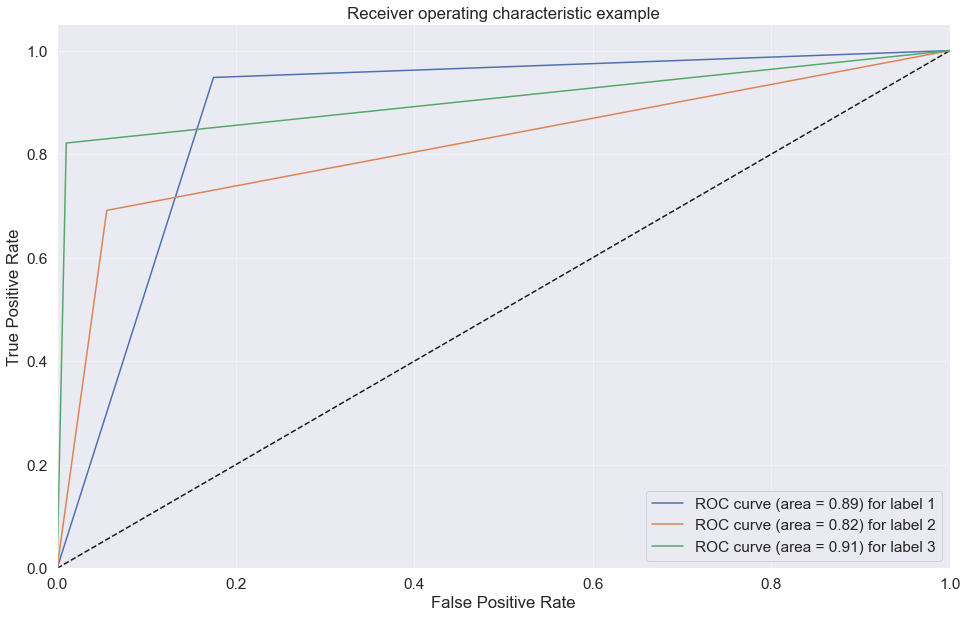

In [81]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(best_clf_knn, X_test, y_test, n_classes=3, figsize=(16, 10))

# Support Vector Machines

## Training Support Vector Classifier without tuning

In [82]:
from sklearn.svm import SVC

In [83]:
svc_model = SVC(probability = True)
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [84]:
y_predictions_svc = svc_model.predict(X_test)

### Classification Metrics w/o hyperparameter tuning

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [86]:
print(classification_report(y_test, y_predictions_svc))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.94       501
         2.0       0.64      0.67      0.65        81
         3.0       0.97      0.64      0.77        56

    accuracy                           0.89       638
   macro avg       0.85      0.76      0.79       638
weighted avg       0.90      0.89      0.89       638



In [87]:
print(accuracy_score(y_test, y_predictions_svc))

0.8918495297805643


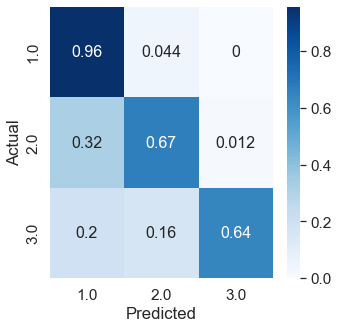

In [88]:
data = confusion_matrix(y_test, y_predictions_svc, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_predictions_svc), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

In [89]:
print("ROC_AUC score for unoptimized SVC model {}".format(roc_auc_score(y_test, svc_model.predict_proba(X_test), multi_class='ovo', average='weighted')
))

ROC_AUC score for unoptimized SVC model 0.9646180119070545


New ROC_AUC score lowered, which could be a bad sign

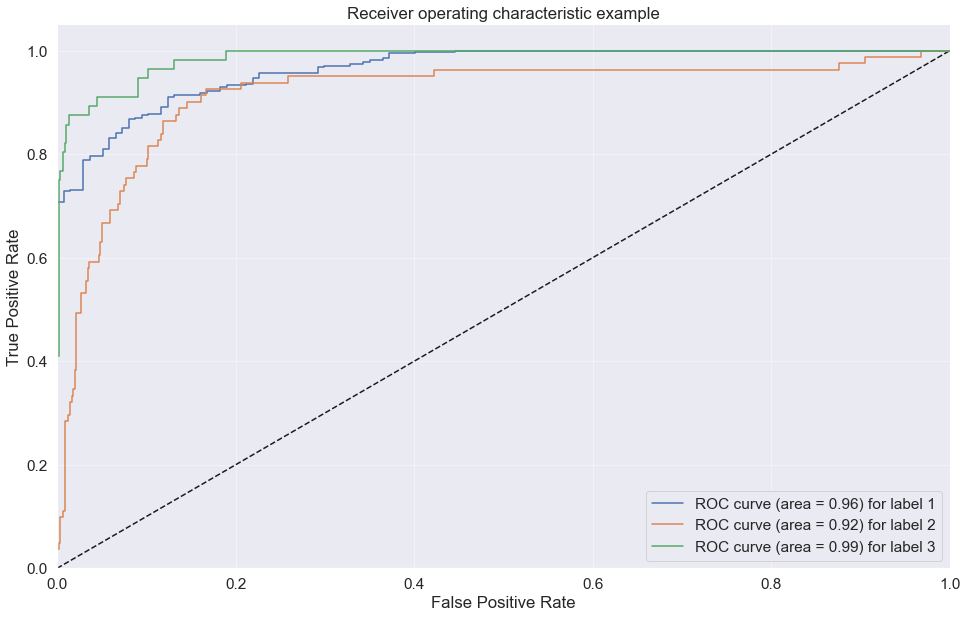

In [90]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(svc_model, X_test, y_test, n_classes=3, figsize=(16, 10))

## Optimizing the SVC model by tuning its parameters

In [91]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']} 

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
clf_svc = GridSearchCV(SVC(probability = True),param_grid,refit=True,verbose=3)

In [94]:
clf_svc.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.872 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.849 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.842 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.845 total time=   0.4s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.923 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.926 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.903 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.902 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.896 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.775 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [95]:
clf_svc.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [96]:
svc_model_optimized = SVC(probability=True, C= 100, gamma= 1, kernel= 'rbf')
svc_model_optimized.fit(X_train, y_train)

SVC(C=100, gamma=1, probability=True)

In [97]:
y_predictions_svc_optimized = svc_model_optimized.predict(X_test)

## Classification Metrics for Optimized SVC model

In [98]:
accuracy_score(y_test,y_predictions_svc_optimized)

0.9106583072100314

In [99]:
print(classification_report(y_test,y_predictions_svc_optimized))

              precision    recall  f1-score   support

         1.0       0.96      0.95      0.95       501
         2.0       0.64      0.69      0.67        81
         3.0       0.91      0.88      0.89        56

    accuracy                           0.91       638
   macro avg       0.84      0.84      0.84       638
weighted avg       0.91      0.91      0.91       638



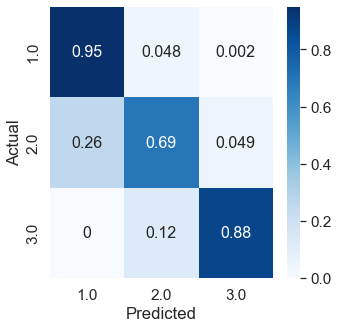

In [100]:
data = confusion_matrix(y_test, y_predictions_svc_optimized, normalize = 'true')
df_cm = pd.DataFrame(data, columns=np.unique(y_predictions_svc_optimized), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});

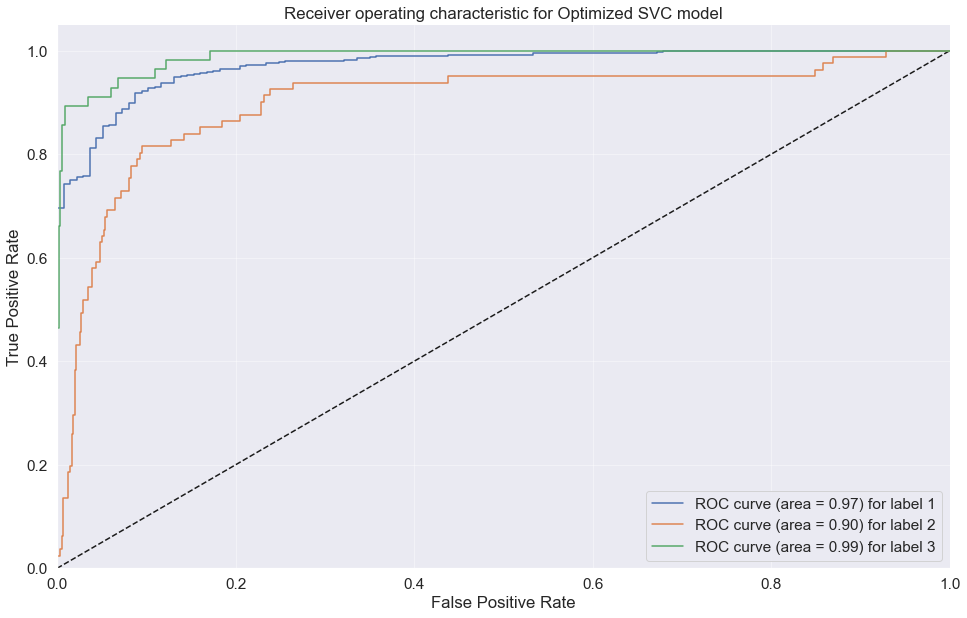

In [101]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for Optimized SVC model')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i+1))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(svc_model_optimized, X_test, y_test, n_classes=3, figsize=(16, 10))

# Naive Bayes Model

## Training Naive Bayes model

In [102]:
# Since the features of our data are continous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb_model = GaussianNB()
scores = cross_val_score(gnb_model, X_train, y_train, n_jobs=4, cv=4, scoring = "accuracy")
print(scores)
np.mean(scores)

[0.75       0.69354839 0.74462366 0.8172043 ]


0.7513440860215055

In [103]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB


nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train, y_train, cv=4, n_jobs=4, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7513440860215055,
 'bernoulli': 0.8346774193548387,
 'multinomial': 0.801747311827957}

This is interesting because bernoulli model usually works with binary data and the multinomial model is usuall the best with continous data. 

Now, let's discretize the dataset. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

* Create `X_discrete` from `X` using .rank(pct=True)
* Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)
* Split `X_discrete` and `y` into training and test datasets
* Fit a MultinomialNB to the training split.
* Get predictions on the test set.
* Plot the confusion matrix for predictions.

In [104]:
X_train_discrete = X_train.rank(pct=True)
X_test_discrete = X_test.rank(pct=True)

In [105]:
X_train_discrete.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
187,0.663306,0.445901,0.309140,0.440860,0.289987,0.498992,0.455645,0.440188,0.460685,0.816532,...,0.327621,0.841398,0.717406,0.887097,0.964718,0.967070,0.930108,0.946573,0.515121,0.810148
278,0.164987,0.205981,0.309140,0.332325,0.289987,0.498992,0.455645,0.518481,0.153898,0.714046,...,0.095766,0.700269,0.039651,0.137433,0.388441,0.191868,0.268481,0.210349,0.149866,0.350134
2021,0.202285,0.205981,0.309140,0.805444,0.985215,0.498992,0.455645,0.823589,0.562164,0.288978,...,0.659946,0.227487,0.305444,0.673387,0.388441,0.048387,0.062164,0.047715,0.486895,0.350134
1386,0.093414,0.668683,0.309140,0.946237,0.735887,0.498992,0.455645,0.343414,0.413978,0.288978,...,0.521169,0.420699,0.258401,0.760417,0.388441,0.422379,0.268481,0.244624,0.833669,0.810148
1998,0.202285,0.205981,0.653898,0.946237,0.969086,0.498992,0.455645,0.795027,0.700605,0.288978,...,0.515793,0.277218,0.047043,0.561492,0.388441,0.267137,0.102151,0.144153,0.818548,0.810148


In [106]:
X_train_discrete = X_train_discrete.applymap(lambda r: int(r*100))
X_test_discrete = X_test_discrete.applymap(lambda r: int(r*100))
X_train_discrete.sample(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1199,80,72,30,57,28,49,45,45,46,66,...,33,83,71,56,38,72,81,77,37,35
1671,0,66,65,24,61,49,45,85,46,28,...,64,47,78,67,38,4,7,4,75,4
1365,43,20,30,44,28,49,45,9,66,28,...,30,60,16,67,38,46,49,46,31,81
826,97,20,30,57,61,49,45,66,15,92,...,39,63,50,56,99,93,91,92,37,81
1557,80,77,30,89,68,49,45,18,61,28,...,57,55,84,43,38,89,87,86,74,35


In [107]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_discrete, y_train)

MultinomialNB()

In [108]:
y_pred_mnb = pd.Series(mnb_model.predict(X_test))
y_pred_mnb

0      1.0
1      1.0
2      2.0
3      1.0
4      1.0
      ... 
633    2.0
634    1.0
635    1.0
636    1.0
637    1.0
Length: 638, dtype: float64

In [109]:
y_test.value_counts()

1.0    501
2.0     81
3.0     56
Name: fetal_health, dtype: int64

In [110]:
y_pred_mnb.value_counts()

1.0    594
2.0     44
dtype: int64

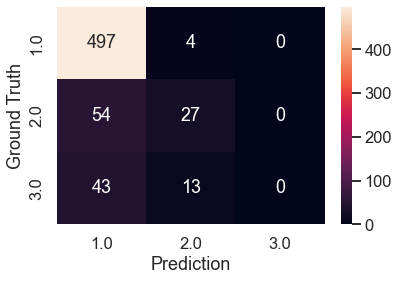

In [111]:
from sklearn.metrics import confusion_matrix

labels = sorted(y_test.unique())

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_mnb, labels=labels),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True,fmt ="d", xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_ylabel('Ground Truth')
ax.set_xlabel('Prediction');

Using MNB with discretized values resulted in a `really bad confusion matrix`. The model has a `100% False Negative result in predicting class 3 (pathological)`. This model **absolutely** cannot be used in production since `babies that DO have problems` will not be detected and the algorithm will output that the babies are `falsely healthy`. It performs badly in predicting class 2 (suspect), but performs well in predicting class 1 (healthy), which may be due to the imbalanced dataset. This model does not work well with imbalanced datasets. 

#Conclusion:

I think one of the best ways we can determine which classification model is the best for this particular problem is by looking at their their confusion matrix:

Below are the models' respective confusion matrix. Note that these figures represent the optimized version of each model:

**Logistic Regression**

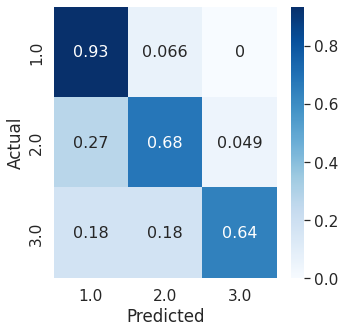

**Random Forest**

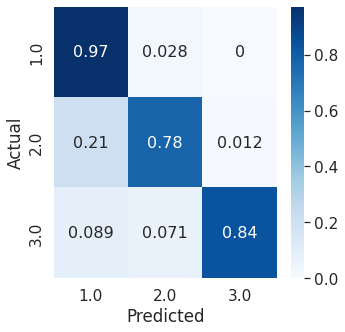

**Decision Tree**

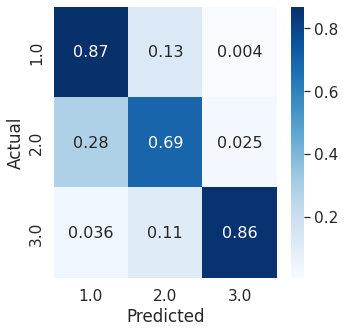

**KNN**

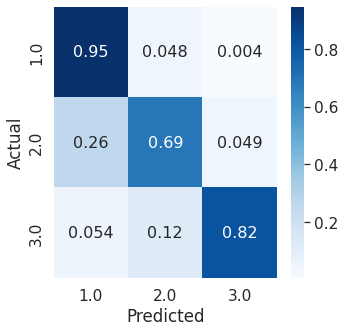

**SVC**

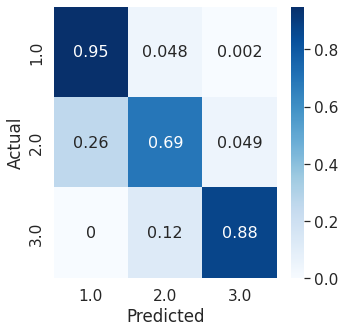

Based on these confusion matrix, I think on the average the random forest model would be favorable in terms of having greater true positives across classes 1 (normal) and 2 (suspect), and only 2nd best in finding true positives for class 3 (pathological).

I also think that the Random Forest classifier performs well in imbalanced data sets like we have here. This means we can rely on it when it is put in production. It also has the best ROC curve for all the 3 classes which means that it is ideal since the ROC curve is a good indicator of the performance of the classifier. This means the rate at which the model is able to predict True Postives are higher than the rate is is able to output False Positives. 